In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white")
sns.set_context("talk")

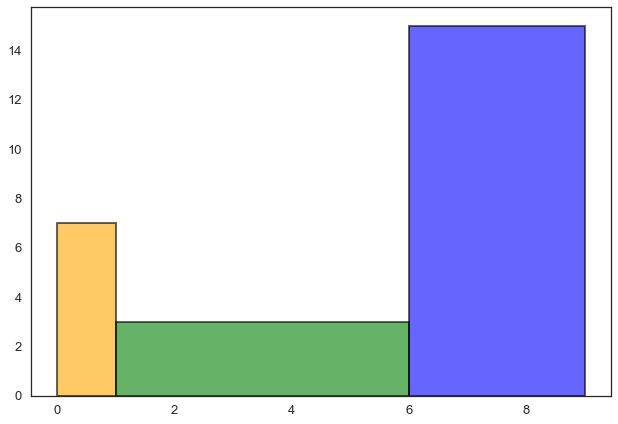

In [2]:
# small example
data = [7, 3, 15]
widths = [1, 5, 3]
left = [0, 1, 6]
plt.bar(left, data, width = widths, color=('orange','green','blue'), 
    alpha = 0.6, align='edge', edgecolor = 'k', linewidth = 2)
plt.show()

In [3]:
df = pd.read_csv('raw/2016-17-ClassCentral-Survey-data-noUserText.csv', decimal=',', encoding = "ISO-8859-1")

In [4]:
# filter on region
#df = df[df['Which region of the world are you in?'] == 'Western Europe (except UK)']

In [5]:
age = df['What is your age range?'].value_counts()
age
#age.hist()

46-55 years old    475
36-45 years old    420
56-65 years old    402
66+ years old      285
30-35 years old    253
22-25 years old    203
26-29 years old    199
18-21 years old    176
10-17 years old     51
Name: What is your age range?, dtype: int64

In [6]:
age.index

Index(['46-55 years old', '36-45 years old', '56-65 years old',
       '66+ years old', '30-35 years old', '22-25 years old',
       '26-29 years old', '18-21 years old', '10-17 years old'],
      dtype='object')

In [7]:
from_age =age.index.map(lambda x: x[:2]).astype(np.int)

In [8]:
to_age = age.index.map(lambda x: x[3:5])
print(to_age == ' y')
# to_age.values[to_age == ' y'] = '75' # dummy max age (unix)
to_age[to_age == ' y'] = '75' # dummy max age (windows)
to_age = to_age.astype(np.int)

[False False False  True False False False False False]


In [9]:
widths = to_age - from_age + 1
widths

array([10, 10, 10, 10,  6,  4,  4,  4,  8])

In [10]:
age_df = pd.DataFrame({'from': from_age, 'to': to_age, 'span': widths, 'count': age})

In [11]:
sorted_age = age_df.sort_values('from')

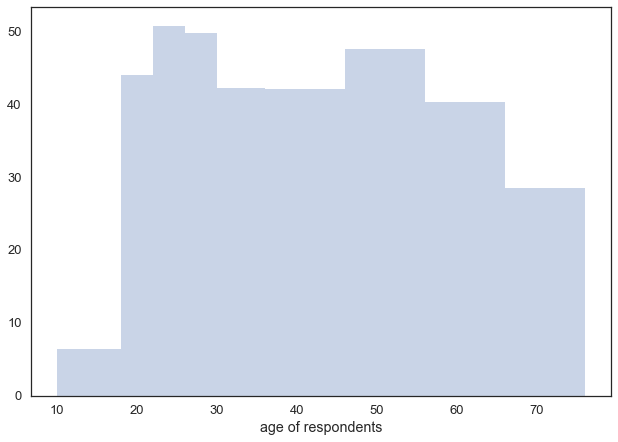

In [12]:
plt.bar(sorted_age['from'], sorted_age['count']/sorted_age['span'], width = sorted_age['span'], 
    alpha = 0.3, align='edge')
plt.xlabel('age of respondents')
plt.show()

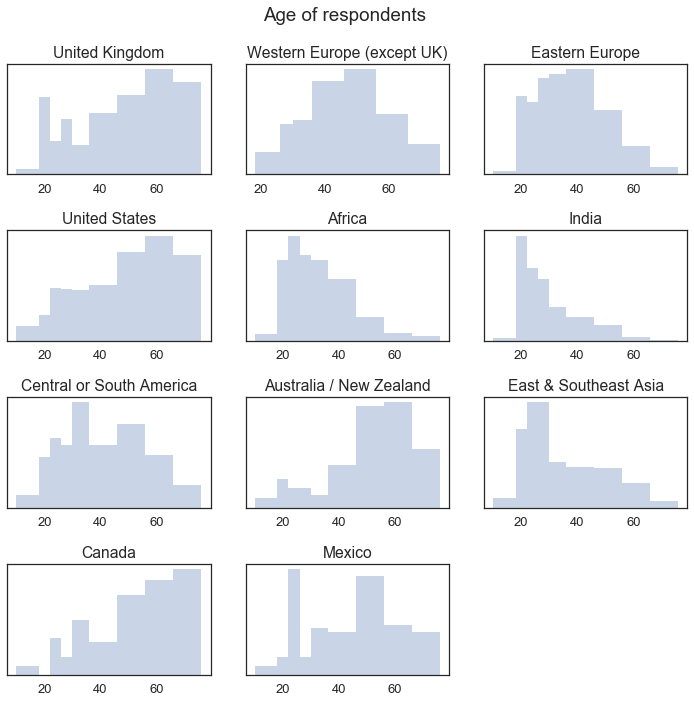

In [13]:
fig = plt.figure(figsize=(10,10))
st = fig.suptitle("Age of respondents")
#st.set_y(1)
#fig.subplots_adjust(top=0.7)
#fig.tight_layout(rect=[0, 0.03, 1, 0.95])
n = 0
for region in df['Which region of the world are you in?'].dropna().unique():
    dfc = df[df['Which region of the world are you in?'] == region]
    age = dfc['What is your age range?'].value_counts()
    from_age = age.index.map(lambda x: x[:2]).astype(np.int)
    to_age = age.index.map(lambda x: x[3:5])
    # to_age.values[to_age == ' y'] = '75' # dummy max age (unix)
    to_age[to_age == ' y'] = '75' # dummy max age (windows)
    to_age = to_age.astype(np.int)
    widths = to_age - from_age + 1
    age_df = pd.DataFrame({'from': from_age, 'to': to_age, 'span': widths, 'count': age})
    sorted_age = age_df.sort_values('from')
    n += 1
    plt.subplot(4, 3, n)
    plt.bar(sorted_age['from'], sorted_age['count']/sorted_age['span'], width = sorted_age['span'], 
        alpha = 0.3, align='edge')
    #plt.xlabel('age of respondents')
    plt.yticks([])
    plt.title(region)   
plt.tight_layout(rect=[0, 0, 1, .95])
plt.show()